<a href="https://colab.research.google.com/github/ibrohim-musayev/sales_up/blob/main/SupMa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns

In [17]:
s_data = "../content/sample_data/sotuvlar.csv"
df = pd.read_csv(s_data)
df.rename(columns = {"Customer type":"Costomer_type","Product line":"Product_line","Unit price":"Unit_price", "Tax 5%":"Tax", "gross margin percentage":"GMP", "gross income":"gross_income"}, inplace=True)
df.head()

,Invoice ID,Branch,City,Costomer_type,Gender,Product_line,Unit_price,Quantity,Tax,Total,Date,Time,Payment,cogs,GMP,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [18]:
df.isnull().sum()

Invoice ID       0
Branch           0
City             0
Costomer_type    0
Gender           0
Product_line     0
Unit_price       0
Quantity         0
Tax              0
Total            0
Date             0
Time             0
Payment          0
cogs             0
GMP              0
gross_income     0
Rating           0
dtype: int64

In [19]:
gend=df['Gender'].value_counts()
x= gend.index
y= gend.values
gend

Female    501
Male      499
Name: Gender, dtype: int64

<BarContainer object of 2 artists>

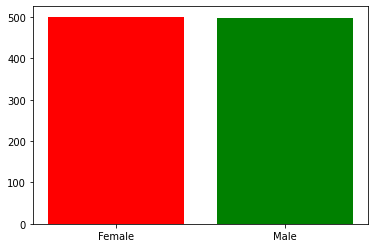

In [20]:
plt.bar(x,y, color=("red", "green"))

In [21]:
branch = df.value_counts("Branch")

<BarContainer object of 3 artists>

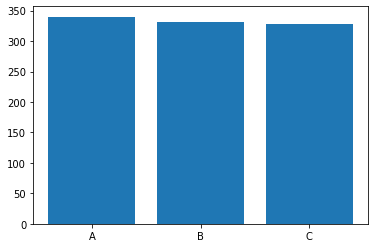

In [22]:
plt.bar(branch.index, branch.values)

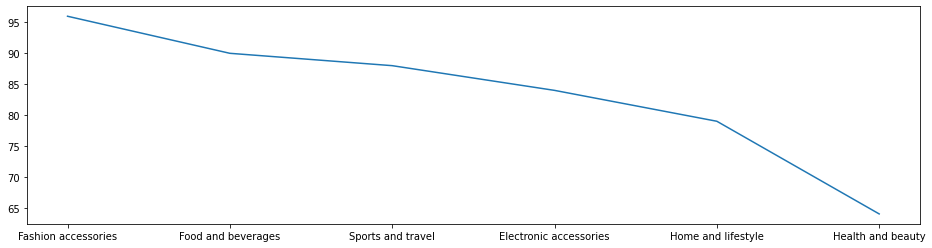

In [23]:
from IPython.core.pylabtools import figsize
#c = df.loc[(df.Gender == 'Female') & (df.Product_line == 'Health and beauty')]
pfem = df.loc[df.Gender == "Female"]
f1 = pfem.value_counts("Product_line")

figsize(16,4)
x1 = f1.index
y1 = f1.values

plt.plot(x1,y1, label = "Female")

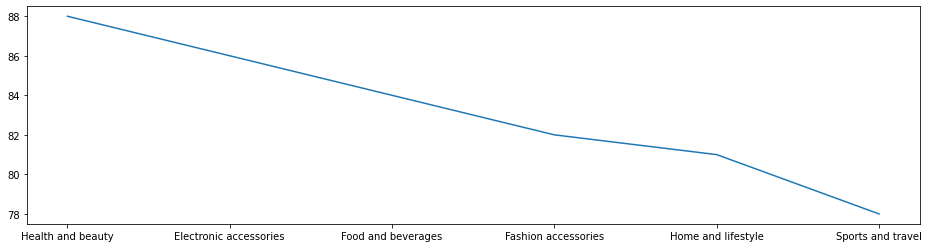

In [24]:
pfem = df.loc[df.Gender == "Male"]
f2 = pfem.value_counts("Product_line")
x2 = f2.index
y2 = f2.values
plt.plot(x2, y2, label = "Male")

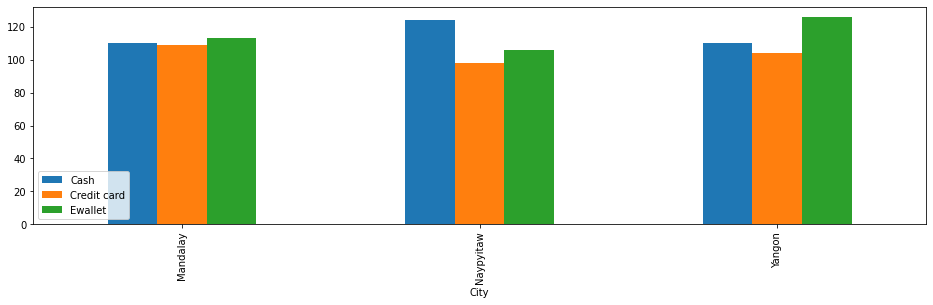

In [25]:
pd.crosstab(df['City'], df['Payment']).plot.bar()
plt.legend(loc='lower left')

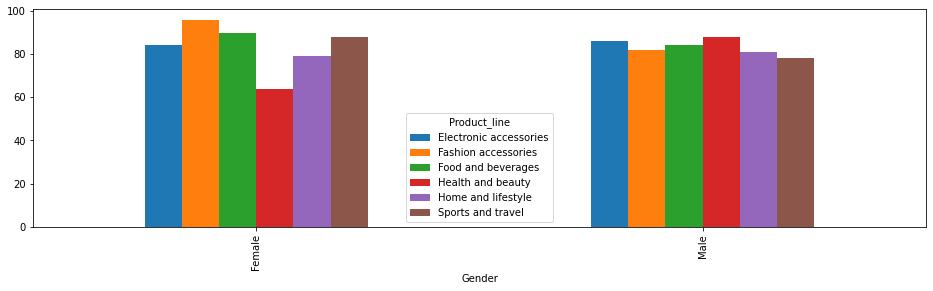

In [26]:
pd.crosstab(df['Gender'], df['Product_line']).plot.bar()

In [27]:
gender_shoppers = df.groupby(['City','Gender']).count()['Quantity']
gender_shoppers

City       Gender
Mandalay   Female    162
           Male      170
Naypyitaw  Female    178
           Male      150
Yangon     Female    161
           Male      179
Name: Quantity, dtype: int64

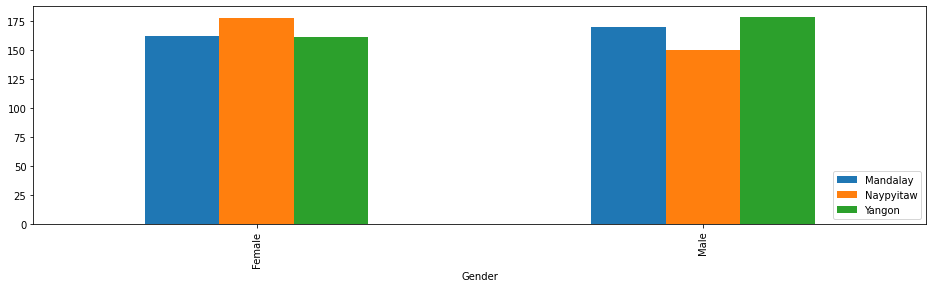

In [28]:
gender_shoppers.unstack(level = 0).plot(kind = 'bar')
plt.legend(loc = "lower right")

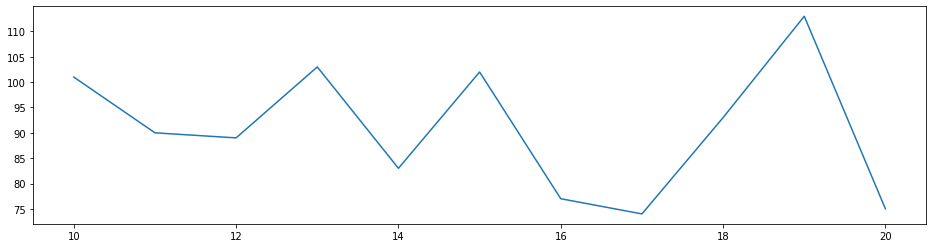

In [29]:
#df['Time'] = pd.to_datetime(df['Time'])
#df['Time']
#df.groupby(["Time"]).count()
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
tm = df.Time.dt.hour
tn = tm.value_counts().sort_index().plot()


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


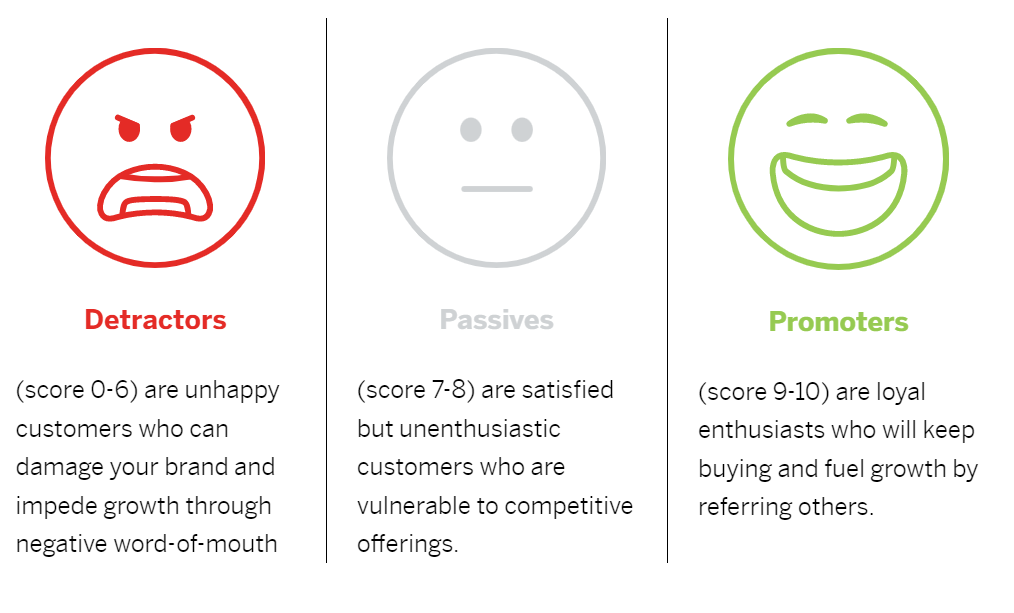


In [31]:
df["Rating"].mean()

6.9727

([<matplotlib.patches.Wedge at 0x7f1ca45c5bd0>,
 [Text(0.4205373008864521, 1.123898740351255, 'Detractors'),
  Text(-0.9239190582028696, -0.5969703291534034, 'Passives'),
  Text(0.8828972206624704, -0.6561192709763104, 'Promoters')])

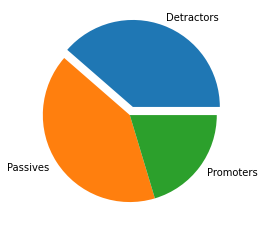

In [32]:
nps_high = len(df.loc[df.Rating >= 9])
nps_o = len(df.loc[(df.Rating < 9) &  (df.Rating >=7)])
nps_lov = len(df.loc[df.Rating < 6])
my_labels = "Detractors", "Passives", "Promoters"
sizes = [(nps_lov/1000)*100, (nps_o/1000)*100, (nps_high/1000)*100]
my_explode = (0.1,0,0)
plt.pie(sizes, labels=my_labels, explode=my_explode)